In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
import pandas as pd
import sympy

# Calculus: Core Concepts

In learning about the Normal Distribution, we used this chart to bound the probability that the population expected value is within certain bounds (i.e., a number of standard errors $\sigma$) around the expected value of sample expected values based on the number of standard errors.

<img src="Standard_deviation_diagram.svg.png" width="40%"/>

But how do we know these percentages? And what if we choose bounds that are not integer multiples of $\sigma$?

<img src="Standard_deviation_diagram.svg.png" width="40%"/>

The answer is ***calculus***

The probabilities in this plot are actually the <i>area under the curve</i>

For example, 34.1% of the area under the curve falls between 0 and $1\sigma$.

13.6% of the total area under the curve falls between $1\sigma$ and $2\sigma$.

The area under the entire curve (i.e., from $-\infty$ to $+\infty$) is 1, which makes sense because this is a probability distribution and "summing" the probabilities over all possible outcomes should equal 1.

## Core concepts of calculus

Calculus covers two core concepts:

First, <font color="red">***derivatives***</font> are the mathematical concept for <font color="red"><u>rate of change</u></font> 
(e.g., a car's speed, cost per item, birth/death rates)

Second, <font color="blue">***integrals***</font> are the mathematical concept for <font color="blue"><u>accumulation</u></font>
(e.g., distance traveled, total cost, population dynamics, and <font color="green">probabilities!</font>)

<font color="red">Derivatives</font> and <font color="blue">integrals</font> are two-sides of the same coin and, in fact, opposites. 

On one hand, if we track a car's speed over time (i.e., a rate of change), then we can calculate how far the car has traveled (i.e., accumulated distance).

- the car traveled 5 miles per hour (mph) for 2 hours,
- then traveled 10 mph for 1 hour,
- and then traveleld 15 mph for 3 hours.

This means the car traveled 

$\left(2\text{ hour}\right)\left(5\frac{\text{miles}}{\text{hour}}\right) + \left(1\text{ hour}\right)\left(10\frac{\text{miles}}{\text{hour}}\right) + \left(3\text{ hour}\right)\left(15\frac{\text{miles}}{\text{hour}}\right) 
= 2\cdot5\text{ miles} + 1\cdot10\text{ miles} + 3\cdot15\text{ miles} = 65\text{ miles}$

This calculation is taking an <font color="blue">integral</font> using rates of change to find the accumulated distance traveled.

On the other hand, if I tell you the car traveled 10 miles in the first 2 hours, then the car averaged $\hspace{1cm}\frac{10\text{ miles}}{2\text{ hour}} = 5 \frac{\text{miles}}{\text{hour}}$ 

If you know that the car then traveled 10 miles in 1 hour, then you know the average speed was 10 mph.

And, finally, if you then hear that the car travels 45 miles in 3 hours, then the car averaged 15 mph.

This calculation is taking <font color="red">derivatives</font> using distance traveled to calculate average rates of change.

In [3]:
# hide
def exploreCarDerivative(time):
    xx = time
    x = np.arange(7)
    y = np.array([5,5,5,10,15,15,15])
    cy = np.cumsum(y)
    plt.figure(figsize=(8,4))
    plt.plot(x,cy,'k-',linewidth=3)
    yy = plt.ylim()
#     plt.plot([2,2],yy,'b--')
#     plt.plot([3,3],yy,'b--')
    plt.ylim(yy)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Hours",fontsize=15)
    plt.ylabel("Distance Travelled (miles)",fontsize=15);
    for i in range(len(x)-1):
        if xx >= x[i] and xx < x[i+1]:
            f = (xx-x[i])/(x[i+1]-x[i])
            yy = cy[i]+(cy[i+1]-cy[i])*f
            s = y[i+1]
            break
    plt.plot(xx,yy,'ro',markersize=15)
    plt.text(xx,yy,"%d mph" % s,va="bottom",ha="right",fontsize=15)
    plt.title("Rate of change from distance travelled",fontsize=15);
    plt.tight_layout()
    
# widgets.interact(exploreCarDerivative,time=(0,5.9,.1));

timeSlider1 = widgets.FloatSlider(min=0, max=5.9, step=0.1, value=5, description="Time (Hours):")
widgets.HBox([timeSlider1,widgets.interactive_output(exploreCarDerivative, {'time': timeSlider1})])

In [4]:
# hide
def exploreCarIntegral(time):
    x = [0,2,2,3,3,6]
    y = [5,5,10,10,15,15]
    x = np.array(x)
    y = np.array(y)
    A = 0.0
    for i in range(len(x)-1):
        if time >= x[i] and time < x[i+1]:
            f = (x[i+1]-time)/(x[i+1]-x[i])
            s = y[i]
            I = i
            A += (time-x[i])*y[i]
            break
        else:
            A += (x[i+1]-x[i])*y[i]
    plt.figure(figsize=(8,4))
    plt.plot(x,y,'k-',linewidth=3)
    plt.fill_between(x[:I],y[:I],color='blue',alpha=.5,linewidth=0)
    plt.fill_between([x[I],time],[s,s],color='blue',alpha=.5,linewidth=0)
    plt.plot(time,s,'ro',markersize=15)
    plt.text(time,s,"%d mph" % s,va="bottom",ha="right",fontsize=15)
    plt.ylim((0,16))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Hours",fontsize=15)
    plt.ylabel("Speed (mph)",fontsize=15)
    plt.title("Distance travelled from rate of change: %0.2f miles" % A,fontsize=15);
    plt.tight_layout()
    
timeSlider2 = widgets.FloatSlider(min=0, max=5.9, step=0.1, value=5, description="Time (Hours):")
widgets.HBox([timeSlider2,widgets.interactive_output(exploreCarIntegral, {'time': timeSlider2})])

This car-driving example is nice to highlight the relationship between derivatives and integrals.

However, this example is unrealistic!

The car ***instantaneously*** changes speeds at $t=2$ and $t=3$ which is not physically possible.

Instead, a car would realisticly ***smoothly*** and ***continuously*** accelerate from one speed to the next.

Instead of a step-wise derivative, the car's rate of change plot should be curvy! But we will need some new tools to handle this more realistic scenario.

# Approximating Derivatives

In the previous video, we considered an example where a car instantaneously changes from one speed to another speed.

This cannot occur in the real-world because the car must gradually accelerate or decelerate in order to change speeds and these changes take some amount of time.

If we assume that a function $f$ is ***smooth*** and ***continuous*** than we can estimate the ***instantaneous rate of change*** at a specific time $t$ using

$
\displaystyle\frac{\color{blue}{df(t)}}{\color{red}{dt}}\approx\frac{\color{blue}{f(t+h)-f(t)}}{\color{red}{h}}
$

where $\color{red}{h}$ is some number representing the period of time before or after time $t$ that we will use to estimate the speed. 

Here, we are estimating the <font color="blue"><i>"rise"</i></font> of a function (vertical change denoted $\color{blue}{df}$) over a certain <font color="red"><i>"run"</i></font> (horizontal change denoted $\color{red}{dt}$), and we call $df(t)/dt$ the <font color="green">"derivative of $f$ with respect to $t$"</font>.

So, let's examine an example of a car smoothly and continuously accelerating over time.

In [12]:
#hide
# these functions are solved using calculus. 
# We will learn techniques to solve them.
# Here, I am using them for demonstration.
derivative = lambda x: x**2
integral = lambda x: (1/3)*x**3

def exploreCarDerivativeSmooth(time,derivative,integral,times,showTangent=False,pltSpeed=False,h=1,showSpeed=False,):
    xx = time
    if type(times) != tuple:
        times = (times,)
    plt.figure(figsize=(6,4))
    for x in times:
        plt.plot(x,integral(x),'k-',linewidth=3)
    yy = plt.ylim()
    plt.ylim(yy)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Hours",fontsize=15)
    plt.ylabel("Distance Travelled (miles)",fontsize=15)
    ty = integral(time)
    plt.plot(time,ty,'ro',markersize=15)
    if showTangent:
        xx = plt.xlim()
        yy = plt.ylim()
        d = derivative(time)
        b = ty-d*time
        plt.plot(xx,d*np.array(xx)+b,'--',color="grey",linewidth=2)
        plt.xlim(xx)
        plt.ylim(yy)
    if pltSpeed:
        plt.text(plt.xlim()[0],plt.ylim()[1],"Speed Estimate:\n$\\frac{f(time+h)-f(t)}{h}$",
                 ha="left",va="top",fontsize=15,color='r')
        if h == 0:
            speed = np.nan
            thx = time
            thy = ty
            plt.text(time,ty,"Estimated Speed: Unknown",va="bottom",ha="right",fontsize=15)
        elif time+h > 0 and time+h < 6:
            thx = time+h
            thy = integral(thx)
            speed = np.abs((thy-ty)/h)
            xx = np.array([time,thx])
            b = speed*time-ty
            plt.plot(xx,integral(xx),'r-',linewidth=3)
            plt.plot(thx,integral(thx),'ro',markersize=5)
            plt.text(time,ty,"Estimated %0.2f mph" % speed,va="bottom",ha="right",fontsize=15)
            plt.plot([time,thx],[ty,ty],'r--')
            plt.plot([thx,thx],[ty,thy],'r--')
            plt.text(time+.5*h,ty,"$h$",ha="center",va="top",fontsize=10,color="r")
            plt.text(thx,ty+.5*(thy-ty),"$f(time+h)-f(time)$",ha="left",va="center",fontsize=10,color="r")
    if showSpeed:
        plt.title("Actual Speed (obtained by magic): %0.2f" % derivative(time),fontsize=15)
    plt.tight_layout()
    

def derivativeWidget(F,derivative,integral,times,timeSliderLimits=(0,5.9)):
    timeSlider3 = widgets.FloatSlider(min=timeSliderLimits[0], 
                                      max=timeSliderLimits[1], step=0.01, value=5, description="Time (Hours):")
    hSlider = widgets.FloatSlider(min=-2, max=2, step=0.1, value=1.5, description="h:")
    showTangentCheckBox = widgets.Checkbox(value=False,description="Show Tangent Line")
    speedEstCheckBox = widgets.Checkbox(value=False,description="Estimate Speed")
    trueSpeedCheckBox = widgets.Checkbox(value=False,description="Show Actual Speed")
    w = widgets.HBox(
        [
            widgets.VBox([timeSlider3,showTangentCheckBox,speedEstCheckBox,hSlider,trueSpeedCheckBox]),
                widgets.interactive_output(
#                     exploreCarDerivativeSmooth, 
                    F,
                    {
                        'time': timeSlider3,
                        'derivative':widgets.fixed(derivative),
                        'integral':widgets.fixed(integral),
#                         'times':widgets.fixed(np.linspace(0,6,100)),\
                        'times':widgets.fixed(times),
                        'showTangent':showTangentCheckBox,
                        'pltSpeed':speedEstCheckBox,
                        'h':hSlider,
                        'showSpeed':trueSpeedCheckBox,
                    })
        ]
    )
    return w

derivativeWidget(exploreCarDerivativeSmooth,derivative,integral,np.linspace(0,6,100))

What happens if the curve is not continuous?

In [6]:
#hide

isnumeric = lambda x: isinstance(x, (int, float, complex)) and not isinstance(x, bool)

step = 5
def derivativeStep(x):
    y = x**2
    return y

def integralStep(x):
    y = (1/3)*x**3
    if isnumeric(x):
        if x >= 3:
            y += step
    else:
        I = (x >= 3)
        y[I] += step
    return y

    
derivativeWidget(exploreCarDerivativeSmooth,derivativeStep,integralStep,
                 (np.linspace(2,2.99,50),np.linspace(3,4,50)),
                 (2,4),
                )

The example had a discontinuity at time $t^*=3$ where the curve suddenly jumped.

In this case, estimating 

$
\hspace{.5cm}
\displaystyle\frac{\color{blue}{df(t^*)}}{\color{red}{dt}}\approx\frac{\color{blue}{f(t^*+h)-f(t*)}}{\color{red}{h}}=\frac{f(3+h)-f(3)}{h}
\hspace{.5cm}
$

yields two different answers depending on if you approach the estimate from the right side (i.e., $h>0$) or from the left side (i.e., $h<0$).

What happens if the curve is not smooth?

In [7]:
#hide
def derivative3(x):
    if isnumeric(x):
        # treat as number
        if x < 3:
            y = 2
        else:
            y = 7
    else:
        # treat as np.array
        y = 2*np.ones(len(x))
        y[(x >= 3)] = 7 
    return y

def integral3(x):
    if isnumeric(x):
        if x < 3:
            y = 2*x
        else:
            y = 2*x+5*(x-3)
    else:
        y = 2*x
        I = (x >= 3)
        y[I] += 5*(x[I]-3)
    return y


derivativeWidget(exploreCarDerivativeSmooth,derivative3,integral3,np.linspace(2,4,100),(2,4))

The example was continuous but had an instantaneous change in speed at time $t^*=3$.

Again, estimating 

$
\hspace{.5cm}
\displaystyle\frac{\color{blue}{df(t^*)}}{\color{red}{dt}}\approx\frac{\color{blue}{f(t^*+h)-f(t*)}}{\color{red}{h}}=\frac{f(3+h)-f(3)}{h}
\hspace{.5cm}
$

yields two different answers depending on if you approach the estimate from the right side (i.e., $h>0$) or from the left side (i.e., $h<0$).

# Calculating exact instantaneous derivatives 

Assuming the function $f(t)$ is smooth and continuous at time $t$, then we can estimate the instantaneous rate of change at time $t$ using

$
\displaystyle\frac{\color{blue}{df(t)}}{\color{red}{dt}}\approx\frac{\color{blue}{f(t+h)-f(t)}}{\color{red}{h}}
$

where the estimate improves as $h$ gets smaller.|

In [8]:
derivativeWidget(exploreCarDerivativeSmooth,derivative,integral,np.linspace(0,6,100))

Since the estimates improve as $h\rightarrow0$, what happens if $h=0$?

$
\displaystyle\frac{\color{blue}{df(t)}}{\color{red}{dt}}\approx\frac{\color{blue}{f(t+h)-f(t)}}{\color{red}{h}}
$

It's not obivous that a solution exists because we divide by zero!

Instead, we are interested in the ***limiting value*** of 
$
\hspace{.5cm}
\displaystyle
\frac{df(t)}{dt}\approx\frac{f(t+h)-f(t)}{h}
\hspace{.5cm}
$
as $h\rightarrow0$.

That is, we want to solve
$
\hspace{.5cm}
\displaystyle\frac{df(t)}{dt}=\displaystyle\color{darkmagenta}{\lim_{h\rightarrow0}\frac{f(t+h)-f(t)}{h}}
\hspace{.5cm}
$

Once a function $f(t)$ is defined, we can use this equation to calculate the derivative of $f$ at any time $t$ so long as the neighborhood of $t$ is smooth and continuous.

Let's try an example where $\color{green}{f(t)=t^2}$

$$
\frac{df(t)}{dt}
= \lim_{h\rightarrow0}\frac{\color{green}{f(t+h)}-\color{green}{f(t)}}{h} 
= \lim_{h\rightarrow0}\frac{(t+h)^2-t^2}{h}
= \lim_{h\rightarrow0}\frac{(t+h)(t+h)-t^2}{h}
= \lim_{h\rightarrow0}\frac{\color{blue}{t^2}+2th+h^2-\color{blue}{t^2}}{h}
= \lim_{h\rightarrow0}\frac{\color{red}{h}\cdot(2t+h)}{\color{red}{h}}
= \color{darkmagenta}{\lim_{h\rightarrow0}}2t+\color{darkmagenta}{h}
=2t
$$

In [9]:
t,h = sympy.symbols("t h")
sympy.diff(t**2,t)

2*t

In [10]:
#hide 
derivativeWidget(exploreCarDerivativeSmooth,lambda x: 2*x,lambda x: x**2,np.linspace(0,6,100))

# Derivatives for Simple Polynomials
To calculate derviatives, we need to solve 
$
\hspace{.5cm}
\displaystyle
\frac{df(t)}{dt}=\lim_{h\rightarrow0}\frac{f(t+h)-f(t)}{h}
\hspace{.5cm}
$
for each function $f(t)$ which is pretty cumbersome.

Instead, we try to identify some common patterns that functions take and solve the derivative for those generic patterns.

In particular, let's solve the derivative for any polynial of the form 
$
\hspace{.5cm}
\displaystyle
f(t)=\sum_{n=0}^n a_n\cdot t^n
\hspace{.5cm}
$
where $a_n$ are constants.

To start, we already considered $f(t)=t^2$, so consider a more generic $f(t)=t^n$ for some integer $n$.

To find $\displaystyle\frac{d\,t^n}{dt}$, we will need to expand something like 
$
\hspace{.5cm}
(x+y)^n
=\overbrace{(x+y)(x+y)\cdots(x+y)}^{n\text{ times}}
\hspace{.5cm}
$ into it's longer form.

To do this, we will need the <a href="https://en.wikipedia.org/wiki/Binomial_theorem">Binomial Theorem</a> which states:

$$
\displaystyle (x+y)^{n}
= \sum_{i=0}^n \color{red}{{n \choose i}}x^{n-i}y^i
={n \choose 0}x^{n}y^{0}+{n \choose 1}x^{n-1}y^{1}+{n \choose 2}x^{n-2}y^{2}+\cdots +{n \choose n-1}x^{1}y^{n-1}+{n \choose n}x^{0}y^{n}
$$

where $\displaystyle\color{red}{{n \choose i}}=\frac{n!}{(n-i)!\cdot i!}=\frac{n\cdot(n-1)\cdot(n-2)\cdots2\cdot1}{\left((n-i)\cdot(n-i-1)\cdots2\cdot1\right)\left(i\cdot(i-1)\cdot(i-2)\cdots2\cdot1\right)}$ is called "$n$ choose $i$." 

"$n$ choose $i$" represents the number of way to choose a set of $i$ unique things from a total collection of $n$ unique things.



For example, how many 5 card hands are possible from a standard 52 playing card deck?

$
\hspace{.5cm}
\displaystyle
{n \choose i} 
= {52 \choose 5} 
= \frac{52!}{(52-5)!\cdot 5!}
=\frac{52\cdot51\cdot50\cdots2\cdot1}{\left(47\cdot46\cdots2\cdot1\right)\left(5\cdot4\cdot3\cdot2\cdot1\right)}
=2,598,960
$

For our purposes, <font color="blue">$\displaystyle{n \choose i}$ is always a constant integer</font>, <font color="magenta">$\displaystyle{n \choose 0}=1$</font>, and <font color="green">$\displaystyle{n \choose 1}=n$</font>.

In [11]:
import math
math.comb(52,5)

2598960

Let $f(t)=t^n$ for some integer $n$
\begin{align}
\frac{df(t)}{dt}
&=\lim_{h\rightarrow0}\frac{f(t+h)-f(t)}{h}
=\lim_{h\rightarrow0}\frac{\color{blue}{(t+h)^n}-t^n}{h}
=\lim_{h\rightarrow0}\frac{\color{blue}{\overbrace{(t+h)(t+h)\cdots(t+h)}^{n\text{ times}}}-t^n}{h} 
\\ \\ 
&=\lim_{h\rightarrow0}\frac{\left(\color{blue}{\displaystyle\sum_{i=0}^n {n \choose i} t^{n-i}h^{i}}\right)-t^n}{h}\hspace{2cm}\text{using the Binomial Theorem} 
\\ \\
&=\lim_{h\rightarrow0}\frac{\color{red}{t^n}+\color{orange}{h}\displaystyle\sum_{\color{red}{i=1}}^n {n \choose i}\cdot t^{n-i}\color{orange}{h^{i-1}}-t^n}{h}
=\lim_{h\rightarrow0}\displaystyle\sum_{i=1}^n {n \choose i}\cdot t^{n-i}\color{orange}{h^{i-1}}
= \lim_{h\rightarrow0}{n \choose 1}\cdot t^{n-1}\color{orange}{h^{1-1}}
\\ \\
&= n\cdot t^{n-1}
\end{align}

## Derivatives: Additivity, Mulitplication by Constants, and the Power Rule

We saw that
$
\hspace{.5cm}
\frac{d\,t^n}{dt}=n\cdot t^{n-1}
\hspace{.5cm}
$
which gives us the derivative of a simple polynomial.

But how do we use this knowledge to calculate the derivative of a more complex polynomial of the form:
$$
F(t) = \displaystyle\sum_{i=0}^n a_i\cdot t^i
=a_0+a_1\cdot t + a_2\cdot t^2+\cdots+a_n\cdot t^n
$$

where each $a_i$ is a constant.

Let's discuss some ways to combine derivatives of simple functions.

## Derivative Additivity
Let's imagine I have two functions $f(t)$ and $g(t)$.

What is the derivative of the function $\hspace{.5cm}H(t)= f(t)+g(t)$?

\begin{align}
\frac{dH(t)}{dt} 
&= \lim_{h\rightarrow0}\frac{H(t+h)-H(t)}{h}
= \lim_{h\rightarrow0}\frac{f(t+h)+g(t+h)-f(t)-g(t)}{h}
\\\\
&= \color{blue}{\lim_{h\rightarrow0}\frac{f(t+h)-f(t)}{h}}+\color{red}{\lim_{h\rightarrow0}\frac{g(t+h)-g(t)}{h}}
\\ \\
&= \color{blue}{\frac{df(t)}{dt}}+\color{red}{\frac{dg(t)}{dt}}
\end{align}

### Derivatives with Multiplication by a Constant
If we know $\frac{df}{dt}$, then what happens if we multiply $f(t)$ by a scalar a constant $a$?

$$
\begin{align}
\frac{d\left(a\cdot f(t)\right)}{dt} 
&= \lim_{h\rightarrow0}\frac{a\cdot f(t+h)-a\cdot f(t)}{h}
= \lim_{h\rightarrow0}\frac{a\left( f(t+h)-f(t)\right)}{h}
\\\\
&= a\left(\lim_{h\rightarrow0}\frac{f(t+h)-f(t)}{h}\right)
=a\cdot\frac{df(t)}{dt}
\end{align}
$$

For example, let $f(t)=t^n$
$$
\frac{d\left(a\cdot f(t)\right)}{dt}
= a\cdot\frac{df(t)}{dt}
= a\cdot\left(\frac{d}{dt}t^n\right)
= a\cdot n\cdot t^{n-1}
$$

## Derivative Power Rule
We saw that
$
\hspace{.5cm}
\frac{d\,t^n}{dt}=n\cdot t^{n-1}
\hspace{.5cm}
$
which we can combine with the additive and constant multiplication properties of derivatives to find the derivative of any polynomial

$
F(t) = \displaystyle\sum_{i=0}^n a_i\cdot t^i
=a_0+a_1\cdot t + a_2\cdot t^2+\cdots+a_n\cdot t^n
$

where each $a_i$ is a constant.


We know the derivative for each of $t,\,t^2,\,t^3,\,\dots,t^{n-1},\,t^n$, and we can write

$
F(t)
=a_0+a_1\cdot \color{blue}{t} + a_2\cdot \color{red}{t^2}+\cdots+a_n\cdot \color{darkmagenta}{t^n}
= a_0+a_1\cdot \color{blue}{f_1(t)}+a_2\cdot \color{red}{f_2(t)}+\cdots+a_n\cdot \color{darkmagenta}{f_n(t)}
$

where $\hspace{.5cm}f_i(t)=t^i\hspace{.5cm}$ and we know that $\hspace{.5cm}\displaystyle\frac{d\,f_i(t)}{dt}=i\cdot t^{i-1}\hspace{.5cm}$ for each $i$.

\begin{align}
\frac{d\,F(t)}{dt} 
&= \color{red}{\frac{d\,a_0}{dt}} + \color{blue}{\frac{d\,\left(a_1f_1(t)\right)}{dt}}+\color{orange}{\frac{d\,\left(a_2f_2(t)\right)}{dt}}+\cdots+\frac{d\,\left(a_nf_n(t)\right)}{dt}
\hspace{.5cm}\text{ using derivative additivity} \\\\
&= \color{red}{0} + \color{blue}{a_1\frac{d\,f_1(t)}{dt}}+\color{orange}{a_2\frac{d\,f_2(t)}{dt}}+\cdots+a_n\frac{d\,f_n(t)}{dt}
\hspace{.5cm}\text{ using derivative mulitplication by a constant} \\\\
&= \color{blue}{a_1\cdot 1} + \color{orange}{a_2\cdot2\cdot t}+\cdots+a_n\cdot n\cdot t^{n-1}
\hspace{.5cm}\text{ using $\hspace{.5cm}\displaystyle\frac{d\,t^n}{dt}=nt^{n-1}$}
\end{align}

In [4]:
# hide

from ipywidgets import interactive, FloatSlider, VBox

# Function to plot polynomial and its derivative
def plot_polynomial_and_derivative(degree, x_value):
    x = np.linspace(-10, 10, 400)
    poly = np.poly1d([1 for _ in range(int(degree) + 1)])
    derivative = np.polyder(poly)
    y = poly(x)
    dy = derivative(x)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    s = '1'
    for i in range(int(degree)):
        s += "+$t^{%d}$" % (i+1)
    ax1.plot(x, y, label=f'Polynomial degree {int(degree)}',linewidth=3)
    ax1.plot(x_value, poly(x_value), 'ro', label='Selected point',markersize=12)
    ax1.legend()
    ax1.set_title('Polynomial: '+s)
    ax1.set_xlabel("t",fontsize=15)
    ax1.grid("on")
    
    ax2.plot(x, dy, label='Derivative',linewidth=3)
    ax2.plot(x_value, derivative(x_value), 'ro', label='Selected point',markersize=12)
    ax2.legend()
    ax2.set_title('Derivative')
    ax2.set_xlabel("t",fontsize=15)
    ax2.grid("on")
    
#     plt.show()

# Sliders
degree_slider = FloatSlider(value=1, min=0, max=10, step=1, description='Degree:')
x_slider = FloatSlider(value=0, min=-10, max=10, step=0.05, description='x value:')

# Interactive widget
interactive_plot = interactive(plot_polynomial_and_derivative, degree=degree_slider, x_value=x_slider)
VBox([interactive_plot])

# Derivative Chain Rule

Previously, we identified a simple heuristic for finding the derivative for any polynomial of the form 
$
\hspace{.5cm}
F(t)=\displaystyle\sum_{i=0}^n a_i\cdot t^i
$

Specifically,
$
\hspace{.5cm}
\displaystyle
\frac{d\,F(t)}{dt}
=\color{blue}{F'(t)}
=\sum_{i=1}^n a_i\cdot i \cdot t^{i-1}
$ 

For convenience, I am introducing a commonly-used shorthand $\color{blue}{F'}$ for representing derivatives.

Applying this heuristic when we encounter a polynomial enables us to skip calculating the polynomial's derivative from the limit 

$
\displaystyle
\color{blue}{F'(t)}=\lim_{h\rightarrow0}\frac{F(t+h)-F(t)}{h}
$

Similarly, once you know the derivative of enough common functions, then you can skip the need to solve the limit each time and instead apply the heuristic. 

Let's find the derivatives for a few common functions so that we can use them to learn how to handle derivatives of more complicated functions made of up simpler functions.

For example, what is $\hspace{.5cm}\displaystyle\frac{d\,\ln(x)}{dx}$?

$\ln(x)$ is the "natural logarithm" and is the inverse of $e^x$. That is, $\hspace{.5cm}\ln(e^x)=x$

$
\begin{align}
\frac{d\,\ln(x)}{dx}  
&= \lim_{h \to 0} \frac{\ln(x+h)-\ln(x)}{h} 
= \lim_{h \to 0} \frac{\ln\left(\frac{x+h}{x}\right)}{h} 
\hspace{1cm}\text{using logarithm rules}
\\\\
&= \lim_{h \to 0} \frac{\ln\left(1 + \frac{h}{x}\right)}{h}
\end{align}
$
 
Let $\color{blue}{u = \frac{h}{x}} $. Note $u\rightarrow0$ as $h\rightarrow0$ and $\color{red}{h = ux}$. Now we substitute $u$ in:

$
\begin{align}
\lim_{h \to 0} \frac{\ln\left(1 + \color{blue}{\frac{h}{x}}\right)}{\color{red}{h}}
&=\lim_{u \to 0} \frac{\ln\left(1 + \color{blue}{u}\right)}{\color{red}{ux}} 
=\frac{1}{x}\cdot\lim_{u \to 0} \frac{\ln\left(1 + u\right)}{u} 
\end{align}
$

Now it's not clear what $\hspace{.5cm}\displaystyle\lim_{u \to 0} \frac{\ln\left(1 + u\right)}{u}\hspace{.5cm}$ should be because of the potential division by zero.

But we can check graphically that the fraction goes to 1 as $h\rightarrow0$.

/tmp/ipykernel_1564860/1711845374.py:3: RuntimeWarning: divide by zero encountered in log
  y = np.log(1+u)/u


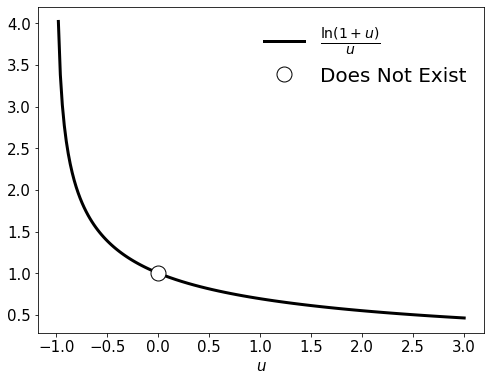

In [10]:
# hide
u = np.linspace(-1,-.05,50)
y = np.log(1+u)/u
plt.figure(figsize=(8,6))
plt.plot(u,y,label="$\\frac{\\ln(1+u)}{u}$",linewidth=3,color='k')
u = np.linspace(.05,3,50)
y = np.log(1+u)/u
plt.plot(u,y,label="_data",linewidth=3,color='k')
plt.plot(0,1,'wo',markeredgecolor='k',markersize=15,label="Does Not Exist")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$u$",fontsize=15)
# plt.ylabel("$\\frac{e^h-1}{h}$",fontsize=15,rotate=90)
plt.legend(fontsize=20,frameon=False);

and so $\hspace{.5cm}\displaystyle\frac{d\,\ln(x)}{dx}=\frac{1}{x}\cdot\left(\lim_{u \to 0} \frac{\ln\left(1 + u\right)}{u}\right) = \frac{1}{x}\cdot(1)$

Another example is finding the derivative of the normal distribution function $\hspace{.5cm}\displaystyle N(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}=A\cdot e^{B\cdot(x-\mu)^2}\hspace{.5cm}$ where $A$ and $B$ are constants that do not change with $x$.

To find $N'(x)$, we need the derivative of $e^{g(x)}$ where $g(x)=B\cdot(x-\mu)^2=Bx^2-(2B\mu)x+(B\mu^2)$ is a polynomial when $\mu$ and $\sigma$ are treated as constants.

Using the Power Rule, we know
$
\hspace{.5cm}
g'(x)=2Bx-2B\mu
$

But what about
$
\hspace{.5cm}
\displaystyle
\frac{d\,e^{g(x)}}{dx}
$?

First, a simpler question. Let $f(x)=e^x$. Can we find $f'(x)$?

\begin{align}
f'(x) 
&= \lim_{h\rightarrow0}\frac{f(x+h)-f(x)}{h}
= \lim_{h\rightarrow0}\frac{\color{blue}{e^{x+h}}-e^x}{h}
= \lim_{h\rightarrow0}\frac{\color{blue}{e^xe^h}-e^x}{h}
\hspace{.5cm}\text{using exponent rules $\color{blue}{a^{b+c}=a^ba^c}$}
\\ \\
&= e^x \left(\lim_{h\rightarrow0}\frac{e^h-1}{h}\right)
\end{align}

At which point it's not obvious how to solve the limit 
$
\hspace{.5cm}
\displaystyle
\lim_{h\rightarrow0}\frac{e^h-1}{h}
\hspace{.5cm}
$
because of the potential division by zero.


However, graphically, it's clear that 
$
\hspace{.5cm}
\displaystyle
\lim_{h\rightarrow0}\frac{e^h-1}{h}
=1
$

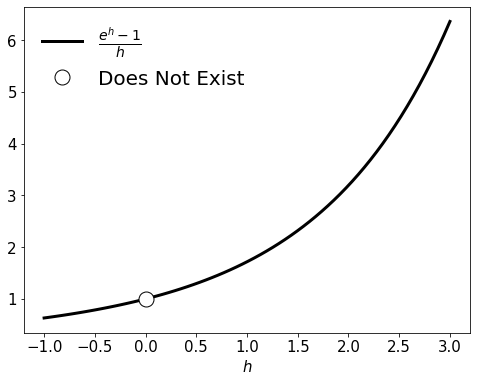

In [9]:
# hide
h = np.linspace(-1,-.05,50)
y = (np.exp(h)-1)/h
plt.figure(figsize=(8,6))
plt.plot(h,y,label="$\\frac{e^h-1}{h}$",linewidth=3,color='k')
h = np.linspace(.05,3,50)
y = (np.exp(h)-1)/h
plt.plot(h,y,label="_data",linewidth=3,color='k')
plt.plot(0,1,'wo',markeredgecolor='k',markersize=15,label="Does Not Exist")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$h$",fontsize=15)
# plt.ylabel("$\\frac{e^h-1}{h}$",fontsize=15,rotate=90)
plt.legend(fontsize=20,frameon=False);

Therefore, 
\begin{align}
f'(x) 
&= \lim_{h\rightarrow0}\frac{f(x+h)-f(x)}{h}
= \lim_{h\rightarrow0}\frac{\color{blue}{e^{x+h}}-e^x}{h}
= \lim_{h\rightarrow0}\frac{\color{blue}{e^xe^h}-e^x}{h}
\hspace{.5cm}\text{using exponent rules $\color{blue}{a^{b+c}=a^ba^c}$}
\\ \\
&= e^x \left(\lim_{h\rightarrow0}\frac{e^h-1}{h}\right)
= e^x\cdot(1)
\color{red}{= e^x}
\end{align}

<font color="magenta">Interestingly, when $f(x)=e^x$ we have $f'(x)=f(x)$</font>

Next, continuing to let $f(x)=e^x$ and $g(x)=Bx^2-2B\mu\cdot x+B\mu^2$, how do we find 
$
\hspace{.5cm}
\displaystyle
\frac{d\,e^{g(x)}}{dx}
$
?

First, notice that $f\left(g(x)\right)=e^{g(x)}$, so a more general question is 

<font color="orange">if $f'(x)$ and $g'(x)$ are known (i.e., both functions are smooth and continuous), then what is
$
\hspace{.5cm}
\displaystyle
\frac{d\,f\left(g(x)\right)}{dx}
$?</font>

By definition:
$
\hspace{.5cm}
\displaystyle
\frac{d\,f\left(g(x)\right)}{dx}
= \lim_{h\rightarrow0}\frac{f\left(g(x+h)\right)-f\left(g(x)\right)}{h}
$

Because $g(x)$ is smooth and continuous, we know that $g(x+h)\approx g(x)$ when $h$ is nearly 0. 

So let $\color{darkmagenta}{H=g(x+h) - g(x)}$ represent the small difference between the two. Note that $H\rightarrow0$ as $h\rightarrow0$.

$\color{darkmagenta}{H=g(x+h) - g(x)}$ and $H\rightarrow0$ as $h\rightarrow0$.

$
\displaystyle
\frac{d\,f\left(g(x)\right)}{dx}
= \lim_{h\rightarrow0}\frac{f\left(\color{darkmagenta}{g(x+h)}\right)-f\left(g(x)\right)}{h}
=\lim_{h\rightarrow0}\lim_{H\rightarrow0}\frac{f\left(\color{darkmagenta}{g(x)+H}\right)-f\left(g(x)\right)}{h}
\\\\ \displaystyle
=\lim_{h\rightarrow0}\lim_{H\rightarrow0}\frac{f\left(g(x)+H\right)-f\left(g(x)\right)}{\color{green}{H}}\cdot\color{green}{\frac{H}{h}}
\\\\ \displaystyle
=\lim_{h\rightarrow0}\lim_{H\rightarrow0}\frac{f\left(g(x)+H\right)-f\left(g(x)\right)}{H}\cdot\frac{\color{darkmagenta}{g(x+h) - g(x)}}{h}
\\\\ \displaystyle
=\color{blue}{\lim_{H\rightarrow0}\frac{f\left(g(x)+H\right)-f\left(g(x)\right)}{H}}\cdot\color{red}{\lim_{h\rightarrow0}\frac{g(x+h) - g(x)}{h}}
=\color{blue}{f'(g(x))}\cdot\color{red}{g'(x)}
$

This yields the derivative ***Chain Rule***:
$
\hspace{.5cm}
\displaystyle
\frac{d\,f(g(x))}{dx} = f'(g(x))\cdot g'(x)
$

Returning to our original question...

Let $f(x)=e^x$ and $g(x)=Bx^2-2B\mu\cdot x+B\mu^2$

We can use the Chain Rule and the Power Rule to solve
$
\begin{align}
\displaystyle
\frac{d\,e^{Bx^2-2B\mu\cdot x+B\mu^2}}{dx}
&= \frac{d\,f(g(x))}{dx}
= f'(g(x))\cdot g'(x)
\hspace{.5cm}\text{using the Chain Rule}
\\\\
&= e^{g(x)}\cdot g'(x)
\hspace{.5cm}\text{because $\displaystyle f'(x)=\frac{d\,e^x}{dx}=e^x$}
\\\\
&= e^{Bx^2-2B\mu\cdot x+B\mu^2}\cdot \left(2Bx-2B\mu\right)
\end{align}
$

by inserting $g(x)$ and using the Power Rule to find $g'(x)$

## Extended Chain Rule
We can recursively apply the Chain Rule to more complicated functions.

Let $a(x),\,b(x)$ and $c(x)$ be ***differentiable*** functions (i.e., they are smooth and continuous), and let $\color{blue}{F(x) = a(b(c(x)))}$

$
\begin{align}
\frac{d\,F(x)}{dx} 
&= a'(b(c(x)))\cdot \color{red}{\frac{d\,b(c(x))}{dx}}
\hspace{1cm}\text{using the Chain Rule on $a(b(\dots))$}
\\\\
&= a'(b(c(x)))\cdot \color{red}{b'(c(x))\cdot c'(x)}
\hspace{1cm}\text{using the Chain Rule on $b(c(x))$}
\end{align}
$

# Derivative Products and Quotients

As mentioned in the last video, calculus is mostly remembering heuristics for the derivatives of simple function (e.g., $e^x$ or polynomials) and combining those simple derivatives to solve the derivatives of more complex functions that are made up of simpler functions.

The Chain Rule allows us to handle when a larger function is <i>composed</i> of smaller functions: $\hspace{.5cm}\displaystyle \frac{d\,f(g(x))}{dx}=f'(g(x))\cdot g'(x)$

Derviative additivity tells us $\hspace{.5cm}\displaystyle \frac{d\,\left(f(x)+g(x)\right)}{dx}=f'(x)+ g'(x)$

What about other combinations of differentiable functions $f(x)$ and $g(x)$?

## Product Rule

Let $F(x) = f(x)\cdot g(x)$

$
\begin{align}
F'(x)
&= \lim_{h\rightarrow0}\frac{F(x+h)-F(x)}{h}
= \lim_{h\rightarrow0}\frac{f(x+h)\cdot g(x+h)-f(x)\cdot g(x)}{h}
\\\\
&= \lim_{h\rightarrow0}\frac{f(x+h)\cdot g(x+h)\color{red}{+\left[f(x)\cdot g(x+h)\right]-\left[f(x)\cdot g(x+h)\right]}-f(x)\cdot g(x)}{h}
\hspace{.5cm}\color{red}{\text{adding 0 to the numerator}}
\\\\
&= \lim_{h\rightarrow0}\frac{\left(f(x+h)-f(x)\right)\cdot g(x+h)\color{blue}{+}f(x)\cdot\left(g(x+h)-g(x)\right)}{h}
\hspace{.5cm}\text{regrouping terms}
\\\\
&= \left(\lim_{h\rightarrow0}\frac{f(x+h)-f(x)}{h}\cdot g(x+h)\right)\color{blue}{+}\left(\lim_{h\rightarrow0}f(x)\cdot\frac{g(x+h)-g(x)}{h}\right)
\\\\
&= f'(x)\cdot g(x)+f(x)\cdot g'(x)
\end{align}
$

## Quotient Rule

Let $F(x)=f(x)/g(x)$. What is $F'(x)$?

First note that $F(x)= f(x)\cdot \frac{1}{g(x)}$ suggesting that we could use the Product Rule.

Next, let $A(x) = 1/x$ and note that $A(g(x)) = 1/g(x)$ suggesting that we could use the Chain Rule.

$A(x)=x^{-1}$ is a polynomial and so we can find it's derivative using the Power Rule:
$
\hspace{.5cm}
\displaystyle
A'(x) = \frac{d\,x^{-1}}{dx} = -x^{-2} = \frac{-1}{x^2}
$

$
\begin{align}
F'(x)
&= f'(x)\cdot \frac{1}{g(x)}+ f(x)\cdot\frac{d\,\color{red}{\left(1/g(x)\right)}}{dx}
\hspace{.5cm}\text{using the Product Rule}
\\\\
&= f'(x)\cdot \frac{1}{g(x)}+ f(x)\cdot\frac{d\,\color{red}{A(g(x))}}{dx}
= f'(x)\cdot \frac{1}{g(x)}+ f(x)\cdot\left(\color{red}{A'(g(x))\cdot g'(x)}\right)
\hspace{.5cm}\text{using the Chain Rule}
\\\\
&= f'(x)\cdot \frac{1}{g(x)}+ f(x)\cdot\left(\color{red}{-g(x)^{-2}\cdot g'(x)}\right)
= \frac{f'(x)}{g(x)}-\frac{f(x)\cdot g'(x)}{g(x)^2}
=\color{orange}{\frac{f'(x)\cdot g(x)-f(x)\cdot g'(x)}{g(x)^2}}
\end{align}
$

# Symbolically Solving Higher Order Derivatives & Partial Derivatives

Derivatives might seem like a purely mathy endeavor, but computers are great at handling them symbolically.

The strategy used by symbolic math libraries, including SymPy, include a database of derviatives for simple functions (e.g., for $t^n$ or $e^x$) and recursively applying the Chain Rule, Product Rule, and Quotient Rule.

You can learn more about doing calculus with SymPy on their <a href="https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html">documentation webpage</a> but I will show you some examples.

Let's try a polynomial that can be solved using the Power Rule and Derivative Additivity.
$
\hspace{.5cm}
F(t) = t^3 + 2\cdot t^2 + 5\cdot t + 2
$

In [28]:
import sympy
# define symbolic variables
t = sympy.symbols("t")
# define a function whose derivative we want to know
F = t**3 + 2*t**2 + 5*t + 2
# take the derivative of F(t) with respect to t
print("Derivative:")
sympy.diff(F,t)

Derivative:


3*t**2 + 4*t + 5

 Another example requiring the Chain Rule: $\hspace{.5cm}G(t)= e^{F(t)}$

In [29]:
F = t**3 + 2*t**2 + 5*t + 2
G = sympy.exp(F)
print(G)
print("Derivative:")
G1 = sympy.diff(G,t)
G1

exp(t**3 + 2*t**2 + 5*t + 2)
Derivative:


(3*t**2 + 4*t + 5)*exp(t**3 + 2*t**2 + 5*t + 2)

In [30]:
# evaluate derivative function at specific value t=2
G1.subs(t,2)

25*exp(28)

## Multiple Derivatives

Imagine we have a car starting from a stop and then travelling over time following the function 
$
\hspace{.5cm}
f(t)=\frac{x^3}{3}+x^2
$

This is similar to an example we already discussed in this module.

In [70]:
# hide
derivativeWidget(exploreCarDerivativeSmooth,lambda x: x**2+2*x,lambda x: (1/3)*x**3+x**2,np.linspace(0,6,100))

Since the car's speed is increasing over time, car must be accelerating over time. 

***Acceleration*** is the rate of change of the rate of change. 

Or, in calculus terms, it's the derivative of the derivative of $f(t)$.

Remember the shorthand $f\color{red}{'}(t)$ for denoting the derivative of $f(t)$.

We do something similar to denote the derivative of the derivative using $f\color{red}{''}(t)$. That is

$
\displaystyle
f''(t) = \frac{d}{dt}\left(\frac{d}{dt}f(t)\right)
$

Lets find the $f''(t)$ using SymPy.

In [31]:
from fractions import Fraction
# original function: distance travelled over time
f = Fraction(1,3)*t**3+t**2
f

t**3/3 + t**2

In [32]:
# first derivative: the speed of the car over time
f1 = sympy.diff(f,t)
f1

t**2 + 2*t

In [33]:
# second derivative: the acceleration of the car over time
f2 = sympy.diff(f1,t)
f2

2*t + 2

Another option is to solve for the second derivative directly in SymPy.

In [35]:
sympy.diff(f,t,t).simplify()

2*t + 2

In [36]:
# alternatively
sympy.diff(f,t,2).simplify()

2*t + 2

Let's see $f(t)$, $f'(t)$, and $f''(t)$ together.

In [37]:
numpy_f = sympy.lambdify(t,f,"numpy")
numpy_f1 = sympy.lambdify(t,f1,"numpy")
numpy_f2 = sympy.lambdify(t,f2,"numpy")
t = np.linspace(0,6,100)
distance,speed,acceleration = numpy_f(t),numpy_f1(t),numpy_f2(t) 

In [38]:
# hide
def plotAllF(tt):
    plt.figure(figsize=(14,4))
    plt.subplot(1,3,1)
    plt.plot(t,distance,linewidth=3)
    plt.plot(tt,numpy_f(tt),'ro',markersize=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Time ($t$)",fontsize=15)
    plt.ylabel("Distance ($f(t)$)",fontsize=15)
    plt.title("$f(t)=%s$" % sympy.latex(f),fontsize=15)
    plt.subplot(1,3,2)
    plt.plot(t,speed,linewidth=3)
    plt.plot(tt,numpy_f1(tt),'ro',markersize=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Time ($t$)",fontsize=15)
    plt.ylabel("Speed ($f'(t)$)",fontsize=15)
    plt.title("$f'(t)=%s$" % sympy.latex(f1),fontsize=15)
    plt.subplot(1,3,3)
    plt.plot(t,acceleration,linewidth=3)
    plt.plot(tt,numpy_f2(tt),'ro',markersize=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Time ($t$)",fontsize=15)
    plt.ylabel("Acceleration ($f''(t)$)",fontsize=15)
    plt.title("$f''(t)=%s$" % sympy.latex(f2),fontsize=15)
    plt.tight_layout()
    
widgets.interact(plotAllF,tt=(0,6,.1));

interactive(children=(FloatSlider(value=3.0, description='tt', max=6.0), Output()), _dom_classes=('widget-inte…

## Partial Derivatives

In economics, a production function describes the relationship between input factors (e.g., workers and technology) and the output of a good or service. Let's denote the production function as $P(L, K)$ where $P$ is the production output, $L$ represents labor, and $K$ represents capital.


Assume a factory's production can be modeled by the function:
$$P(L, K) = 100\cdot L^{0.5}\cdot K^{0.5} $$
where $P$ is the number of nails produced, $L$ is the number of labor hours, and $ K$ is the capital investment in machinery.

We want to understand how changes in labor or capital alone affect production.

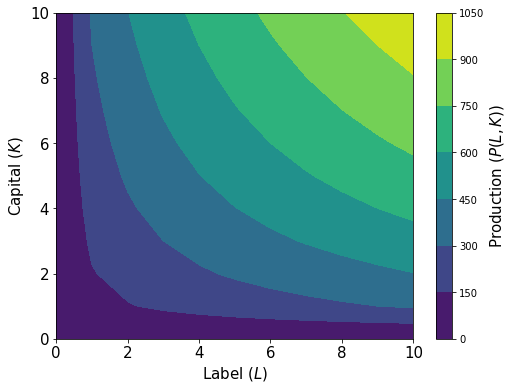

In [27]:
# hide 
P = lambda L,K: 100 * L**0.5 * K**0.5
Ls = np.arange(0,11)
Ks = np.arange(0,11)
LL,KK = np.meshgrid(Ls,Ks)
pp = P(LL,KK)
plt.figure(figsize=(8,6))
plt.contourf(Ls,Ks,pp)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Label ($L$)",fontsize=15)
plt.ylabel("Capital ($K$)",fontsize=15)
cb = plt.colorbar()
cb.set_label("Production ($P(L,K)$)",fontsize=15);

$$P(L, K) = 100\cdot L^{0.5}\cdot K^{0.5} $$

To explore the impact of changing one variable while keeping the other constant, we calculate the ***partial derivatives*** of the production function with respect to $L$ and $K$.

Sometimes functions are comprised of multiple variables. Partial derivatives are the derivatives of functions with respect to one of those variables while the remaining variables are treated as constant.

How does increasing the number of labor hours (while keeping capital constant) affect production?

The partial derviative of $P(K,L)$ with respect to labor $L$ is

$
\displaystyle
\begin{align}
\frac{\partial\,P(K,L)}{\partial L} &= P'_L(K,L) = \frac{d}{dL}\left(100\cdot L^{0.5}\cdot K^{0.5}\right)
\\\\
&= \frac{d}{dL}\left(\color{red}{C}\cdot L^{0.5}\right)
\hspace{.5cm}\text{where $\color{red}{C=100\cdot K^{0.5}}$ is a constant}
\\\\
&= 0.5\cdot \color{red}{C}\cdot L^{-0.5}
\hspace{.5cm}\text{using the Power Rule}
\\\\
&= 0.5\cdot \color{red}{100\cdot K^{0.5}} \cdot L^{-0.5}
= 50\cdot \sqrt{K/L}
\hspace{.5cm}\text{substituting in for $C$ and simplifying}
\\\\
\end{align}
$

In [39]:
# solving the partial derivative using SymPy
K,L = sympy.symbols("K L")
P = 100 * L**0.5 * K**0.5
P

100*K**0.5*L**0.5

In [40]:
# partial derivative wrt K
P_L = sympy.diff(P,L)
P_L

50.0*K**0.5/L**0.5

# Example: Population Growth

Many factors shape a specie's population growth over time.

Partially, population is determined by a specie's reproduction rate $\color{red}{r}$ representing how many babies are born at time $t$.

But, the environment also shapes population growth. For example, the amount of food available in an environment can create a "carrying capacity" $\color{blue}{k}$ limiting the maximum number of animals that can find enough nutrition.

In the absence of predators or competition for food, a small population will grow until it reaches the environment's carrying capacity.

Biologists describe population growth using the ***logistic curve*** (often called an S-curve):
$$
L(t)={\frac {\color{blue}{k}}{1+e^{-\color{red}{r}\cdot (t-t_0)}}}
$$

where $t$ is time and $L$ is the population.


In [44]:
# hide
L = lambda t,k,r,t0: k/(1+np.exp(-r*(t-t0)))

def plotLogistic(k,r,t0,t=None):
    if t is None:
        t=np.linspace(0,20,20)
    y = L(t,k,r,t0)
    plt.plot(t,y,label="$L(t)=\\frac{%0.1f}{1+e^{-%0.1f(t-%0.1f)}}$" % (k,r,t0))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Time ($t$)",fontsize=15)
    plt.ylabel("Population Size ($L$)",fontsize=15)
    plt.legend(fontsize=15,frameon=False,loc="upper left")
    plt.ylim((0,2))
    
kSlider = widgets.FloatSlider(min=0, max=2, step=0.1, value=1, description="$k$:")
rSlider = widgets.FloatSlider(min=0, max=2, step=0.1, value=1, description="$r$:")
toSlider = widgets.FloatSlider(min=0, max=20, step=0.1, value=10, description="$t_0$:")
widgets.HBox([
    widgets.VBox([kSlider,rSlider,toSlider]),
    widgets.interactive_output(plotLogistic,{'k': kSlider,'r':rSlider,'t0':toSlider})
])

Let's consider the simplifed version where $k=r=1$ and $t_0=0$
$$
L(t)=\frac {1}{1+e^{-t}}
=\frac {e^t}{1+e^t}
$$

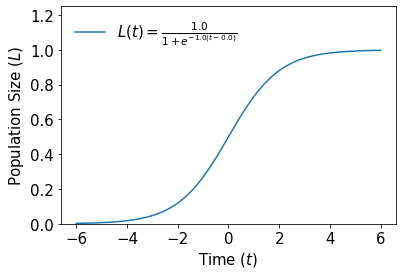

In [51]:
#hide 
plotLogistic(1,1,0,np.linspace(-6,6,100))
plt.ylim(0,1.25);

$
\displaystyle
\begin{align}
L(t)&=\frac {1}{1+e^{-t}}=\color{red}{\frac {e^t}{1+e^t}}
\\\\\\
L'(t)
&=\frac {e^{t}\cdot (1+e^{t})-e^{t}\cdot e^{t}}{(1+e^{t})^{2}}
\hspace{1cm}\text{using the Quotient Rule}
\\\\
&=\frac {e^{t}+e^{2t}-e^{2t}}{(1+e^{t})^{2}}
=\frac {e^{t}}{(1+e^{t})^{2}}
\\\\
&=\left({\frac {e^{t}}{1+e^{t}}}\right)\left({\frac {1}{1+e^{t}}}\right)
=\left({\color{red}{\frac {e^{t}}{1+e^{t}}}}\right)\left(1-\color{red}{\frac {e^{t}}{1+e^{t}}}\right)
=L(t)\left(1-L(t)\right)
\end{align}
$

In [52]:
# hide
def logisticSubplot(xx):
    x = np.linspace(-6,6,100)
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plotLogistic(1,1,0,x)
    plt.plot(xx,L(xx,1,1,0),'ro')
    plt.ylim(0,1.25)
    plt.title("Population Growth",fontsize=15)
    plt.subplot(1,2,2)
    l = lambda x,k,r,x0: L(x,k,r,x0)*(1-L(x,k,r,x0))
    y = l(x,1,1,0)
    plt.plot(x,y)
    plt.plot(xx,l(xx,1,1,0),'ro')
    plt.title("Derivative",fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel("Population Rate of Change",fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Time ($t$)",fontsize=15)
    plt.tight_layout()
    
widgets.interact(logisticSubplot,xx=(-6,6,.1));

interactive(children=(FloatSlider(value=0.0, description='xx', max=6.0, min=-6.0), Output()), _dom_classes=('w…

# Derivatives and Stationary Points

Imagine a car is moving at a constant speed of <font color="blue">50 miles per hour (mph)</font>.

At time $t=0$, the car begins to decelerate (i.e., accelerate negatively) at a constant <font color="red">$5$ miles per hour squared (i.e., $m/h^2$)</font>.

At what time will the car stop?

We can write the elements of this problem using the tools in this module.
- Let $f(t)$ represent the car's distance over time (we don't actually need to know what $f(t)$ looks like).
- $\color{blue}{f'(0)=50\text{ mph}}$ but we do not know $f'(t)$ for $t>0$
- $\color{red}{f''(t)=-5}$ for all $t\geq0$


Since the car has a constant deceleration of $\color{red}{-5}$, we can write that the car's speed $f'(t)$ is changing from the constant value $\hspace{.5cm}f'(0)=50\hspace{.5cm}$ according to 
 
$
\displaystyle
f'(t) = \color{blue}{50} + t\cdot \color{red}{f''(t)} = 50\color{red}{-5}\cdot t
$

where you might recognize that 
$
\hspace{.5cm}
\displaystyle
    \frac{d\,(\color{red}{-5}\cdot t)}{dt}  = \color{red}{-5} = f''(t)
$

Note that according to this solution $\hspace{.5cm}f'(0)=50- \color{red}{5}\cdot 0=50\hspace{.5cm}$ as required by the problem statement.

At what time will the car stop?

The car is stopped when the car's speed is 0. In other words, what is the time $t$ when $\hspace{.5cm}f'(t)=0\hspace{.5cm}$?

$
0 = f'(t) = \color{blue}{50}-\color{red}{5}t \hspace{.5cm}\Rightarrow\hspace{.5cm}  \color{red}{5}t=\color{blue}{50} \hspace{.5cm}\Rightarrow\hspace{.5cm} t=\color{blue}{50}/\color{red}{5} = 10\text{ hours}
$

In [63]:
#hide

t,c = sympy.symbols('t c')
f1 = 50+c*t
f2 = c
f = sympy.integrate(f1,t)
# print(f)
F = sympy.lambdify(t,f.subs(c,-5),"numpy")
F1 = sympy.lambdify(t,f1.subs(c,-5),"numpy")
F2 = lambda t: -5*np.ones(len(t))
t = np.linspace(0,15,50)

def carFixedPoint(tt):
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.plot(t,F(t))
    yy = plt.ylim()
    plt.plot([10,10],yy,'--',color="grey")
    plt.plot(tt,F(tt),'ro',markersize=10)
    plt.ylim(yy)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Time $t$",fontsize=15)
    plt.ylabel("Distance from\nBeginning of Deceleration",fontsize=15)
    plt.title("$f(t)=%s$" % sympy.latex(f.subs(c,-5)),fontsize=15)
    plt.subplot(1,3,2)
    plt.plot(t,F1(t))
    xx = plt.xlim()
    plt.plot(xx,[0,0],'--',color="grey")
    plt.plot(tt,F1(tt),'ro',markersize=10)
    plt.xlim(xx)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Time $t$",fontsize=15)
    plt.ylabel("Speed",fontsize=15)
    plt.title("$f'(t)=%s$" % sympy.latex(f1.subs(c,-5)),fontsize=15)
    plt.subplot(1,3,3)
    plt.plot(t,F2(t))
    plt.plot(tt,F2(np.array([tt])),'ro',markersize=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Time $t$",fontsize=15)
    plt.ylabel("Acceleration",fontsize=15)
    plt.title("$f''(t)=%s$" % sympy.latex(f2.subs(c,-5)),fontsize=15)
    plt.tight_layout()
    
widgets.interact(carFixedPoint,tt=(t[0],t[-1],.1));

interactive(children=(FloatSlider(value=7.5, description='tt', max=15.0), Output()), _dom_classes=('widget-int…

Note: It might not be clear how I know the solution for $f(t)=\frac{-5 t^{2}}{2} + 50 t$. We will discuss this in the next module. But you can confirm for yourself that the derivative of $f(t)$ is indeed $f'(t)$

In general, derivatives can identify the ***stationary points*** of functions when the function's rate of change is zero.

You do this by
1. finding the derivative function, 
2. setting the derivative function equal to zero, and 
3. solving the resulting equation.

Here is another example finding stationary points.

Imagine a roller coaster with the shape: $\hspace{.5cm}f(x) = - x^{3} + 11 x^{2} - 34 x + 33$

Where are the potential locations that the roller coaster car might get stuck?

In [62]:
# some curvy polynomial with peaks and valleys.
# ask where a roller coaster car might get stuck

# hide
x = sympy.symbols("x")
scoaster = -(x-1)*(x-4)*(x-6)+9
coaster = sympy.lambdify(x,scoaster,"numpy")

def plotCoaster():
    F = coaster
    x = np.linspace(0,6.5,100)
    y = F(x)
    plt.figure(figsize=(8,5))
    plt.plot(x,np.zeros(len(x)),'k-')
    plt.plot(x,y,linewidth=3,label="Rollercoaster\nTrack")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Distance from Start ($x$)",fontsize=15)
    plt.ylabel("Rollercoaster Height",fontsize=15)
    plt.legend(fontsize=15,frameon=False)
def coasterWidget(car):
    xx = car
    plotCoaster()
    plt.plot(xx,coaster(xx),'ro',markersize=10)
    plt.title("Rollercoaster Shape: $%s$" % sympy.latex(scoaster.expand()),fontsize=15)
    
# widgets.interact(coasterWidget,car=(x[0],x[-1],.1));
carSlider = widgets.FloatSlider(min=0, max=6.5, step=0.1, value=0, description="car:")
widgets.HBox([carSlider,widgets.interactive_output(coasterWidget,{'car': carSlider,})])

Without seeing the rest of the track, there are two points where the coaster might get stuck: 
- The bottom of the valley ($x_1$) and
- the top of the hill ($x_2$).

<font color="red">How do we find the exact locations?</font>

We have identified locations where the rollercoaster track is <font color="red">flat</font> which means the rate of the change of the rollercoaster track is zero (i.e., $f'(x_1)=f'(x_2)=0$).

So, we can find the exact locations of these stationary points by finding $f'(x)$ and finding the $x$ values so that $f'(x)=0$.

In [64]:
x = sympy.symbols("x")
f = -x**3 + 11*x**2 - 34*x + 33
f

-x**3 + 11*x**2 - 34*x + 33

In [65]:
# can check using Power Rule and Derivative Additivity
f1 = sympy.diff(f,x)
f1

-3*x**2 + 22*x - 34

In [66]:
# could also solve by hand using the Quadratic formula
stationaryPoints = sympy.solve(f1,x) # solves when a SymPy function is equal to zero
stationaryPoints

[11/3 - sqrt(19)/3, sqrt(19)/3 + 11/3]

In [69]:
# f1.subs(x,value) substitutes the value in for the symbol x in the function f1
f1.subs(x,stationaryPoints[1]).simplify()

0